In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('winequality-red.csv')

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
correlations=df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


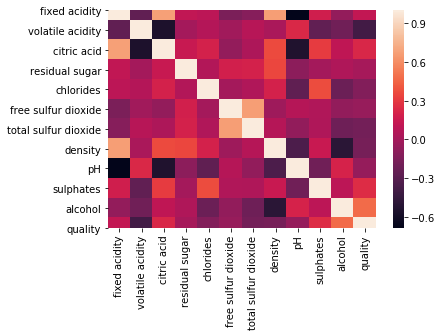

In [4]:
sns.heatmap(df.corr())
plt.show()

In [5]:
def get_features(corr_threshold):
    abs_corrs=correlations.abs()
    return abs_corrs[abs_corrs>corr_threshold].index.values.tolist()

In [6]:
features=get_features(0.05)
print(features)
x=df[features]
y=df['quality']


['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)
regressor=LinearRegression()
regressor.fit(x_train,y_train)
regressor.coef_

train_pred=regressor.predict(x_train)
train_pred

test_pred = regressor.predict(x_test)
test_pred

array([5.10801475, 5.65933623, 5.90407267, 6.13461179, 5.00611866,
       5.44514691, 5.05735245, 6.15497513, 5.51919603, 5.77259374,
       5.61809366, 5.23616173, 5.23544213, 5.31968644, 6.47007277,
       5.043404  , 5.85287121, 5.19427909, 6.07727089, 6.34949018,
       6.42525555, 5.51221957, 5.8030796 , 4.93637817, 5.16618356,
       5.48255293, 5.13758624, 6.60000969, 5.88754763, 5.74133915,
       6.09716961, 6.29379754, 4.91269821, 5.88611904, 5.11007273,
       5.94574773, 6.80685536, 5.04305653, 5.25438683, 5.88611904,
       5.17406542, 4.84008442, 6.48781656, 5.40521715, 5.31105571,
       5.84484462, 5.7100681 , 5.24300809, 5.25021217, 5.46398911,
       5.08740494, 5.61369555, 6.01375792, 6.32497377, 5.47511954,
       5.36466869, 5.09234555, 4.92625623, 5.21415941, 5.08274744,
       4.79570013, 5.4377645 , 5.25237771, 5.68830391, 5.85145609,
       6.52420079, 5.38691412, 5.71775637, 5.17641417, 5.99156845,
       5.6445189 , 5.60892012, 5.74967567, 5.21702288, 5.97975

In [11]:
train_rmse=metrics.mean_squared_error(train_pred,y_train)**0.5
test_rmse=metrics.mean_squared_error(test_pred,y_test)**0.5
predict_data=np.round(test_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.48443407559847157
Mean Squared Error: 0.39380413462920977
Root Mean Squared Error: 0.627538153923098


In [12]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient']
coeffecients




,Coeffecient
fixed acidity,0.017737
volatile acidity,-0.992560
citric acid,-0.139629
chlorides,-1.590943
free sulfur dioxide,0.005597
total sulfur dioxide,-0.003520
density,0.768590
pH,-0.437414
sulphates,0.812888
alcohol,0.301484
